# IYPT: Guitar String
Problem 11 of the 34th International Young Physicists' Tournament

## analytical solution
using `sympy` library,
attempt to algorithmically find analytical solution for given parameters

In [50]:
from sympy import *

I_m, omega, phi = symbols('I_m omega phi')
t, beta, gamma, omega_0, m = symbols('t beta gamma omega_0 m')
y, F = symbols('y, F', cls=Function)

def analytically(substitution = {}):    
    ydprime  = y(t).diff(t, 2)
    damping  = 2 * beta * omega_0 * y(t).diff(t)
    system   = omega_0**2 * y(t) * (1 + gamma * y(t)**2)
    driving  = F(t)
    
    lefthand = ydprime + damping + system
    ritehand = driving / m
    eq = Eq(lefthand, ritehand)
    print('law:')
    display(eq)
    eq = eq.subs(substitution)
    print('substituted:')
    display(eq)
    return dsolve(eq)

analytically({
    gamma: 0,
})

law:


Eq(2*beta*omega_0*Derivative(y(t), t) + omega_0**2*(gamma*y(t)**2 + 1)*y(t) + Derivative(y(t), (t, 2)), F(t)/m)

substituted:


Eq(2*beta*omega_0*Derivative(y(t), t) + omega_0**2*y(t) + Derivative(y(t), (t, 2)), F(t)/m)

Eq(y(t), C1*exp(omega_0*t*(-beta - sqrt(beta**2 - 1))) + C2*exp(omega_0*t*(-beta + sqrt(beta**2 - 1))) - exp(omega_0*t*(-beta - sqrt(beta**2 - 1)))*Integral(F(t)*exp(beta*omega_0*t)*exp(omega_0*t*sqrt(beta**2 - 1)), t)/(2*m*omega_0*sqrt(beta**2 - 1)) + exp(omega_0*t*(-beta + sqrt(beta**2 - 1)))*Integral(F(t)*exp(beta*omega_0*t)*exp(-omega_0*t*sqrt(beta**2 - 1)), t)/(2*m*omega_0*sqrt(beta**2 - 1)))

## numerical solution
calculating with `scipy`, `numpy` libraries
plotting via `matplotlib` library

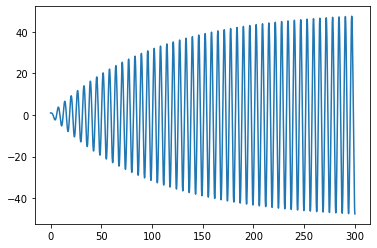

In [53]:
from numpy import *
from scipy.integrate import odeint 
from matplotlib import pyplot as plt

# parameters required
# some are set to unit
beta    = 1 * 10**-2
gamma   = 0
omega_0 = 1
m       = 1

# driving force
omega   = 1
I_m     = 1
phi     = 0
def F(t): return I_m * sin(omega * t + phi)

# numerical model
# y is list of displacement function and its derivatives
# t is respective time coordinate
def model(y, t):
    system  = omega_0**2 * y[0] * (1 + gamma * y[0]**2)
    damping = 2 * beta * omega_0 * y[1]
    driving = F(t)
    return y[1], -system - damping + driving

# initial conditions [x,y]
start = [0,1]

# duration in seconds
stop  = 300

# sampling ticks per second
ticks = 1000

space = linspace(0, stop, ticks * stop)
sols  = odeint(model, start, space)
sol   = sols[0:,1]

plt.plot(space, sol)